#  Install package

In [37]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar
# ! pip install langchain
# ! pip install langchain-openai
# ! pip install geojson
# ! pip install OSMPythonTools

# Import package

In [38]:
%load_ext autoreload
%autoreload 2
    
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
# from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

import pickle
import sys
import osmnx as ox



import LLM_Find_Constants as constants
import helper

from LLM_Find_kernel import Solution

from langchain_openai import ChatOpenAI

from langchain_core.prompts import ChatPromptTemplate





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:

OpenAI_key = helper.load_OpenAI_key()
# llm = ChatOpenAI(api_key=OpenAI_key, model="gpt-4o", temperature=0)

## Input task and data desciption

In [40]:
# isReview = True
isReview = False

In [41]:
# task

In [42]:
# # Case 1
# task_name ='OSM_PA_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_PA_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Pennsylvania State, USA from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of South Carolina State, USA from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_PA_hospital'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_PA_hospital.gpkg.'
# task = rf'''1. Download all hospitals in Pennsylvania State, USA, from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_hospital'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_hospital.gpkg.'
# task = rf'''1. Download all hospitals in South Carolina State, USA, from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_school'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_school.gpkg.'
# task = rf'''1. Download all schools in South Carolina State, USA, from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_CA_park'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_CA_parks.gpkg.'
# task = rf'''1. Download all parks in California, USA, from OpenStreetMap, including urban public, recreation, state, and national parks.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_USA_university'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_USA_universities.gpkg.'
# task = rf'''1. Download all universities and colleges in USA from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_state_college_street'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_state_college_street.gpkg.'
# task = rf'''1. Download all streets of State College, Pennsylvania, USA, from OpenStreetMap.
# 2. Save the downloaded data as polylines in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_tract'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_tract.gpkg.'
# if os.path.exists(saved_fname):
#     os.remove(saved_fname)
# task = rf'''1. Download all census tract boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_blockgroups'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_blockgroups.gpkg.'
# if os.path.exists(saved_fname):
#     os.remove(saved_fname)
# task = rf'''1. Download all Census block group boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_Nigeria_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Nigeria_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Nigeria from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''


# task_name ='OSM_Afghanistan_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Afghanistan_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Afghanistan from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# Case 1
# task_name ='Census_Centre_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_Centre_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Centre County of Pennsylvania State, USA from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_countries_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# # This is a difficult case, the above cases were okay during the test.
task_name ='Wuhan_railway_network'
saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Wuhan_Railway_network.gpkg.'
task = rf'''1. Download the railway network in Wuhan, Hubei, China.
2. Save the downloaded data as polylines in GeoPackage format, save it at: {saved_fname} 
'''
# Using "Hubei Province" may not return polygons.



save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)
# 
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
# model_name = "gpt-3.5-turbo"


# model_name = r'gpt-4o'
model_name = r'gpt-4'


model = ChatOpenAI(api_key=OpenAI_key, model=model_name, temperature=1, stream=True)

# model

e:\ProgramData\Anaconda3\envs\ox\Lib\site-packages\langchain_core\utils\utils.py:161: UserWarning: WARNING! stream is not default parameter.
                stream was transferred to model_kwargs.
                Please confirm that stream is what you intended.
  warnings.warn(


In [43]:
%load_ext autoreload
%autoreload 2
import helper
    
source_select_prompt_str = helper.create_select_prompt(task=task)

# solution = Solution(
#                     task=TASK,
#                     task_name=task_name,
#                     save_dir=save_dir,
#                     data_locations=DATA_LOCATIONS,
#                     model=model,
#                     )
# print("Prompt to select data source:\n")
# print(source_select_prompt_langChain.dict()['messages'][1]['prompt']['template'])
print(source_select_prompt_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data.
 
Your mission: select a suitable data source from the given list to download the requested geo-spatial data for this task: 1. Download the railway network in Wuhan, Hubei, China.
2. Save the downloaded data as polylines in GeoPackage format, save it at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Wuhan_Railway_network.

In [44]:
# print("")

from IPython.display import clear_output

chunks = []

async for chunk in model.astream(source_select_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

{'Explaination': "Since the task involves downloading railway network data for a city in China, it will be suitable to use OpenStreetMap as it provides street networks among other geographical data.", "Selected data source": 'OpenStreetMap'}


In [45]:
import ast
select_source = ast.literal_eval(LLM_reply_str)

selected_data_source= select_source['Selected data source']
data_source_ID = constants.data_source_dict[selected_data_source]['ID']

print("selected_data_source:", selected_data_source)
print("data_source_ID:", data_source_ID)

handbook_list = constants.handbooks[f"{data_source_ID}"]
handbook_str =  '\n'.join([f"{idx + 1}. {line}" for idx, line in enumerate(handbook_list)])
print()
print(f"Handbook:\n{handbook_str}")

selected_data_source: OpenStreetMap
data_source_ID: OpenStreetMap

Handbook:
1. If you need to download the administrative boundary of a place from OpenStreetMap, please use a Python package named 'OSMnx' by this code line: `ox.geocode_to_gdf(query, which_result=None, by_osmid=False, buffer_dist=None)`. This method is fast. 
2. If you need to download POIs, you may use the Overpass API, which is faster than OSMnx library. Code example is: `area['SO3166-2'='US-PA']->.searchArea;(nwr[amenity='hospital'](area.searchArea););out center;`
3. If you need to download polylines, you may use the Overpass API, which is faster than OSMnx library.
4. You need to use OSMnx Python package to download cities, neighborhoods, boroughs, counties, states, or countries. The code is: `gdf = ox.geocode_to_gdf(places)`. The Overpass API `area['name'='target_placename']` usually return emplty results; do not use it. You usually need to obtain the boundaries first then use it to filter out the target data.
5. Y

In [46]:
# constants.handbooks[f"US_Census"]

%load_ext autoreload
%autoreload 2

download_prompt_str = helper.create_download_prompt(task, selected_data_source, handbook_str)

# solution = Solution(
#                     task=TASK,
#                     task_name=task_name,
#                     save_dir=save_dir,
#                     data_locations=DATA_LOCATIONS,
#                     model=model,
#                     )
# print("Prompt to select data source:\n")
# print(source_select_prompt_langChain.dict()['messages'][1]['prompt']['template'])
print(download_prompt_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data. When downloading geo-spatial data, the handbook for a perticular data source is provided, you can follow it, and write Python code carefully to download the data. 
 
Your mission: download geo-spatial data from the given data source for this task: 1. Download the railway network in Wuhan, Hubei, China.
2. Save the downloaded data as polylines in GeoPackage format, save it a

In [47]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(download_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

```python
import requests
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

def download_data():
    # Step 1: Obtain the boundary of Wuhan.
    wuhan_boundary = ox.geocode_to_gdf('Wuhan, Hubei, China')
    west, south, east, north = wuhan_boundary.unary_union.bounds
    
    # Step 2: Fetching railway network data of Wuhan from OpenStreetMap.
    # Please note to replace " " (space) with "%20" in the Overpass API URL.
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = f"""
        [out:json];
        (
            way["railway"]({south},{west},{north},{east});        
        );  
        out geom;    
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()

    # Create a empty GeoDataFrame for the edges
    gdf_railway = gpd.GeoDataFrame(columns=['osmid', 'geometry'], crs='EPSG:4326')

    # Create railway lines
    for element in data['elements']:
        if elemen

In [48]:
code = helper.extract_code_from_str(LLM_reply_str, task)
display(Code(code, language='python'))

import requests
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

def download_data():
    # Step 1: Obtain the boundary of Wuhan.
    wuhan_boundary = ox.geocode_to_gdf('Wuhan, Hubei, China')
    west, south, east, north = wuhan_boundary.unary_union.bounds
    
    # Step 2: Fetching railway network data of Wuhan from OpenStreetMap.
    # Please note to replace " " (space) with "%20" in the Overpass API URL.
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = f"""
        [out:json];
        (
            way["railway"]({south},{west},{north},{east});        
        );  
        out geom;    
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()

    # Create a empty GeoDataFrame for the edges
    gdf_railway = gpd.GeoDataFrame(columns=['osmid', 'geometry'], crs='EPSG:4326')

    # Create railway lines
    for element in data['elements']:
        if element['type'] 

import requests
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

def download_data():
    # Step 1: Obtain the boundary of Wuhan.
    wuhan_boundary = ox.geocode_to_gdf('Wuhan, Hubei, China')
    west, south, east, north = wuhan_boundary.unary_union.bounds
    
    # Step 2: Fetching railway network data of Wuhan from OpenStreetMap.
    # Please note to replace " " (space) with "%20" in the Overpass API URL.
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = f"""
        [out:json];
        (
            way["railway"]({south},{west},{north},{east});        
        );  
        out geom;    
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()

    # Create a empty GeoDataFrame for the edges
    gdf_railway = gpd.GeoDataFrame(columns=['osmid', 'geometry'], crs='EPSG:4326')

    # Create railway lines
    for element in data['elements']:
        if element['type'] == 'way':
            line = LineString([(node['lon'], node['lat']) for node in element['geometry']])
            gdf_railway = gdf_railway.append({'geometry': line, 'osmid': element['id']}, ignore_index=True)
    
    # Step 3: Save the data into a GeoPackage.
    gdf_railway.to_file(driver='GPKG', filename="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Find\\Downloaded_Data\\Wuhan_Railway_network.gpkg")

download_data()

In [49]:
# gdf = gpd.read_file(saved_fname)
# # gdf
# gdf.plot()

In [50]:
# wuhan_gdf.plot()
# railway_data.to_file(r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Wuhan_Railway_network.gpkg', driver='GPKG')

# # points
# railway_data

In [51]:
# place_name = 'Wuhan, Hubei, China'
# place_boundary = ox.geocode_to_gdf(place_name)

# # Retrieve the Bounding Box of Wuhan
# west, south, east, north = place_boundary.unary_union.bounds

# # Query String to Download Railway Data for the Bounding Box using Overpass API
# overpass_url = "https://overpass-api.de/api/interpreter"
# overpass_query = f"""
# [out:json];
# (way["railway"]( {south}, {west}, {north}, {east} );
# );
# out geom;
# """
# # Sending GET Request to Overpass API
# response = requests.get(overpass_url, 
#                         params={'data': overpass_query})

# # Parsing the JSON Response
# data = response.json()
# coords_list = []
# tags_list = []

# # Reading the Railway Network Data
# for element in data['elements']:
#     if 'geometry' in element:
#         coords = [(geom['lon'], geom['lat']) for geom in element['geometry']]
#         coords_list.append(LineString(coords))
#         tags_list.append(element['tags'])

# # Creating a GeoDataFrame
# railway_data = gpd.GeoDataFrame(tags_list, geometry=coords_list)

In [52]:

%autoreload 2
%load_ext autoreload
    
code = helper.execute_complete_program(code=code, try_cnt=10, task=task, model_name=model_name)
display(Code(code, language='python'))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-------------- Running code (trial # 1/10) --------------


code in get_debug_prompt: import requests
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

def download_data():
    # Step 1: Obtain the boundary of Wuhan.
    wuhan_boundary = ox.geocode_to_gdf('Wuhan, Hubei, China')
    west, south, east, north = wuhan_boundary.unary_union.bounds
    
    # Step 2: Fetching railway network data of Wuhan from OpenStreetMap.
    # Please note to replace " " (space) with "%20" in the Overpass API URL.
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = f"""
        [out:json];
        (
            way["railway"]({south},{west},{north},{east});        
        );  
        out geom;    
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()

    # Create a empty GeoDataFrame for the edges

import requests
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

def download_data():
    # Step 1: Obtain the boundary of Wuhan.
    wuhan_boundary = ox.geocode_to_gdf('Wuhan, Hubei, China')
    west, south, east, north = wuhan_boundary.unary_union.bounds
    
    # Step 2: Fetching railway network data of Wuhan from OpenStreetMap.
    # Please note to replace " " (space) with "%20" in the Overpass API URL.
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = f"""
        [out:json];
        (
            way["railway"]({south},{west},{north},{east});        
        );  
        out geom;    
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()
    
    # Create an empty list for storing the railway lines
    railway_lines = []
    
    # Go through the data and for each way, create a LineString instance and add it to our list
    for element in data['elements']:
        if element['type'] == 'way':
            line = LineString([(node['lon'], node['lat']) for node in element['geometry']])
            railway_lines.append({'geometry': line, 'osmid': element['id']})

    # Convert the list to a GeoDataFrame
    gdf_railway = gpd.GeoDataFrame(railway_lines, columns=['geometry', 'osmid'], crs='EPSG:4326')
    
    # Step 3: Save the data into a GeoPackage.
    gdf_railway.to_file(driver='GPKG', filename="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Find\\Downloaded_Data\\Wuhan_Railway_network.gpkg")

download_data()

# Show the downloaded data

<Axes: >

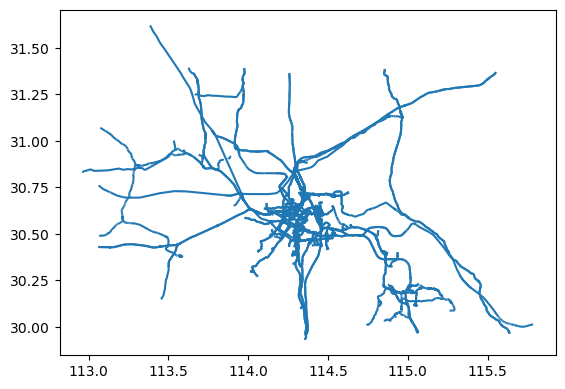

In [53]:
gdf = gpd.read_file(saved_fname)
gdf.plot()

In [54]:
saved_fname

'E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Find\\Downloaded_Data\\Wuhan_Railway_network.gpkg.'

In [55]:
gdf

,electrified,frequency,gauge,maxspeed,name,name:de,name:en,name:zh,passenger_lines,railway,...,red,tram,condition,network:wikidata,departures_board,light_rail,monorail,proposed:railway,level,geometry
0,contact_line,50,1435,100,京广线,Bahnstrecke Peking–Guangzhou,Beijing–Guangzhou Railway,京广线,2,rail,...,None,None,None,None,None,None,None,None,None,"LINESTRING (114.22675 30.57234, 114.22673 30.5..."
1,contact_line,50,1435,100,京广线,Bahnstrecke Peking–Guangzhou,Beijing–Guangzhou Railway,京广线,2,rail,...,None,None,None,None,None,None,None,None,None,"LINESTRING (114.22674 30.57554, 114.22675 30.5..."
2,contact_line,50,1435,125,京广线,Bahnstrecke Peking–Guangzhou,Beijing–Guangzhou Railway,京广线,2,rail,...,None,None,None,None,None,None,None,None,None,"LINESTRING (114.35280 30.69646, 114.35286 30.6..."
3,contact_line,50,1435,80,麻武铁路,None,None,None,1,rail,...,None,None,None,None,None,None,None,None,None,"LINESTRING (114.60875 30.99382, 114.60788 30.9..."
4,contact_line,50,1435,160,沪蓉线,None,Shanghai-Chengdu Line,None,None,rail,...,None,None,None,None,None,None,None,None,None,"LINESTRING (114.34207 30.72807, 114.34143 30.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8428,yes,None,1435,None,光谷现代有轨电车T1线,None,None,None,None,tram,...,None,None,None,None,None,None,None,None,None,"LINESTRING (114.43771 30.44195, 114.43759 30.4..."
8429,None,None,None,None,None,None,None,None,None,platform,...,None,None,None,None,None,None,None,None,-2,"LINESTRING (114.32732 30.53961, 114.32736 30.5..."
8430,None,None,None,None,None,None,None,None,None,platform,...,None,None,None,None,None,None,None,None,-2,"LINESTRING (114.32719 30.53967, 114.32723 30.5..."
8431,None,None,None,None,None,None,None,None,None,rail,...,None,None,None,None,None,None,None,None,None,"LINESTRING (113.31806 30.86729, 113.30540 30.8..."


In [56]:
# import geopandas as gpd
# import osmnx as ox
# import requests
# import os
# from shapely.geometry import LineString

# def download_data():
#     # Define the area of interest (Wuhan, Hubei Province, China)
#     place_name = "Wuhan, Hubei, China"
    
#     # First, get the boundary of Wuhan
#     boundaries = ox.geocode_to_gdf(place_name)
    
#     # Convert the boundary to a bounding box for the Overpass API query
#     bbox = boundaries.unary_union.bounds
#     north, south, east, west = bbox[3], bbox[1], bbox[2], bbox[0]
    
#     # Construct the Overpass API query for the railway network
#     overpass_url = "http://overpass-api.de/api/interpreter"
#     # Notice formatting, 'poly' requires coordinate pairs in clockwise order and close it by repeating the first point
#     overpass_query = f"""
#     [out:json];
#     (
#       way["railway"](poly:"{south} {west} {south} {east} {north} {east} {north} {west} {south} {west}");
#     );
#     out geom;
#     """

#     overpass_query = """   
#     [out:json];
#     (
#       way["railway"]( 29.971956, 113.076933, 31.362241, 115.696653);
#       relation["railway"]( 29.971956, 113.076933, 31.362241, 115.696653);
#       area["railway"]( 29.971956, 113.076933, 31.362241, 115.696653);
#     );
#     out geom;
#     """

#     print("overpass_query:", overpass_query)
    
#     # Send request to the Overpass API
#     response = requests.get(overpass_url, params={"data": overpass_query})
#     data = response.json()

#     print("data:", data.keys())

#     # return data
    
#     # Parse the response to get railway polylines
#     railways = []
#     geometries = []
#     for element in data['elements']:
#         if element['type'] == 'way' and 'geometry' in element:
#             coords = [(pt['lon'], pt['lat']) for pt in element['geometry']]
#             line = LineString(coords)
#             properties = element['tags']
#             railways.append(properties)
#             geometries.append(line)
    
#     # Convert railway data to GeoDataFrame, explicitly setting the geometry
#     gdf = gpd.GeoDataFrame(railways, crs="EPSG:4326", geometry=geometries)

#     # Define file path to save
#     file_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Wuhan_Railway_network.gpkg"

#     # Create directories if they do not exist
#     os.makedirs(os.path.dirname(file_path), exist_ok=True)

#     # Save the data as a GeoPackage
#     gdf.to_file(file_path, layer='railways', driver="GPKG")

#     return data, gdf

# geo_json_dict, gdf = download_data()
# gdf.plot()

In [57]:
# # gdf
# elements = geo_json_dict['elements']

# len(elements)

In [58]:
# # convert 'way' to line
# from tqdm import tqdm

# def way_to_line(geo_json_dict):

#     return lines

# elements = geo_json_dict['elements']
# railways = []
# geometries = []
# way_cnt = 0
# rel_cnt = 0
# area_cnt = 0
# print(len(elements))
# for element in tqdm(elements):
#     try:
#             # print(type(element))
#         if element['type'] == 'way' and 'geometry' in element:
#             coords = [(pt['lon'], pt['lat']) for pt in element['geometry']]
#             # print(element['type'])
#             line = LineString(coords)
#             properties = element['tags']
#             railways.append(properties)
#             geometries.append(line) 
#             way_cnt += 1
            
#         if element['type'] == 'relation' and 'geometry' in element:
#                 rel_cnt += 1
            
#         if element['type'] == 'area' and 'geometry' in element:
#                 area_cnt += 1
            

#     except Exception as e:
#         print(e, element)

# way_cnt, rel_cnt, area_cnt

In [59]:
# import geopandas as gpd
# from shapely.geometry import LineString
# import requests

# def download_data():
#     # Query for Overpass API to get the railway network in Hubei Province, China
#     overpass_url = "http://overpass-api.de/api/interpreter"
#     overpass_query = """
#     [out:json];
#     area["name"="Hubei"]->.searchArea;
#     (
#       way["railway"](area.searchArea);
#     );
#     out body;
#     >;
#     out skel qt;
#     """
    
#     try:
#         response = requests.get(overpass_url, params={'data': overpass_query})
#         response.raise_for_status() # Check if the request was successful
#         data = response.json()
#     except requests.exceptions.RequestException as e:
#         print(f"Error downloading data: {e}")
#         return
    
#     # Parse the downloaded data
#     elements = data.get('elements', [])
#     if not elements:
#         print("No data found in the response.")
#         return
    
#     nodes = {element['id']: (element['lat'], element['lon']) for element in elements if element['type'] == 'node'}
#     ways = [element for element in elements if element['type'] == 'way']

#     # Creating GeoDataFrame
#     features = []
#     for way in ways:
#         try:
#             coords = [nodes[node] for node in way['nodes']]
#             if 'tags' in way:
#                 tags = way['tags']
#                 feature = {
#                     'type': 'Feature',
#                     'geometry': LineString(coords),
#                     'properties': tags
#                 }
#                 features.append(feature)
#         except KeyError as e:
#             # If a node ID in 'nodes' does not exist in 'nodes' dictionary, skip the way
#             print(f"Skipping way with missing node: {e}")
#             continue
    
#     geojson_data = {'type': 'FeatureCollection', 'features': features}
    
#     gdf = gpd.GeoDataFrame.from_features(geojson_data['features'], crs="EPSG:4326")
    
#     # Save as GeoPackage
#     output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Hubei_Railway_network.gpkg"
#     gdf.to_file(output_path, layer='railways', driver="GPKG")

# download_data()

# gdf = gpd.read_file(saved_fname)
# gdf.plot()

In [60]:
# import osmnx as ox
# import geopandas as gpd

# def download_boundary(city_name):
#     """
#     Download the administrative boundary of a specified city using OSMnx.

#     Parameters:
#     - city_name (str): Name of the city to download the boundary for.

#     Returns:
#     - GeoDataFrame containing the city boundary.
#     """
#     # Specify the city and the boundary type (administrative)
#     place_query = {'city': city_name, 'country': 'China'}
#     boundary_gdf = ox.geocode_to_gdf(place_query, which_result=2)
    
#     # Optionally, save the boundary to a file
#     boundary_gdf.to_file(f"{city_name}_boundary.shp")

#     return boundary_gdf

# # Example usage: Download and plot the boundary of Wuhan
# wuhan_boundary = download_boundary("Wuhan")
# print(wuhan_boundary)

# # Plot the boundary
# wuhan_boundary.plot()